# Predicting the Sale Price of Bulldozers using machine learning
## Predict the auction sale price for a piece of heavy equipment to create a "blue book" for bulldozers

## 1. Problem definition
predicting the futer sale price of a bulldozer.

## 2. Data
The data is taken from Kaggle https://www.kaggle.com/c/bluebook-for-bulldozers/data.

The data for this competition is split into three parts:

* Train.csv is the training set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.


The key fields are in train.csv are:

* SalesID: the uniue identifier of the sale
* MachineID: the unique identifier of a machine.  A machine can be sold multiple times
* saleprice: what the machine sold for at auction (only provided in train.csv)
* saledate: the date of the sale

There are several fields towards the end of the file on the different options a machine can have.  The descriptions all start with "machine configuration" in the data dictionary.  Some product types do not have a particular option, so all the records for that option variable will be null for that product type.  Also, some sources do not provide good option and/or hours data.

## 3. Evaluation
The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4. Features
The Data dictionary is provided with the project at `/Data/Data Dictionary.xlsx`

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import sklearn  

In [10]:
df = pd.read_csv("Data/TrainAndValid.csv", low_memory= False)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [12]:
# Looke for null values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [13]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

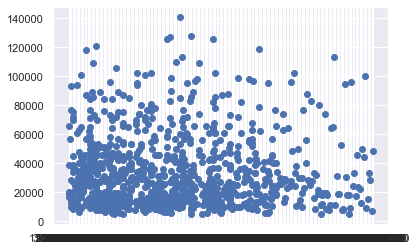

In [14]:
fig , ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

<AxesSubplot:ylabel='Frequency'>

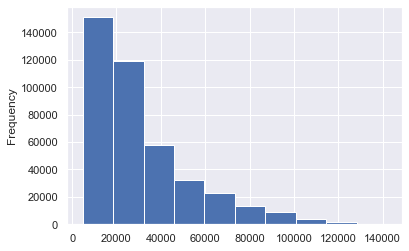

In [15]:
df.SalePrice.plot.hist()

In [16]:
# import the data after parsing dates
df = pd.read_csv("Data/TrainAndValid.csv",
                 low_memory= False,
                parse_dates=["saledate"])

In [17]:
df.saledate.dtype

dtype('<M8[ns]')

In [18]:
df.saledate

0        2006-11-16
1        2004-03-26
2        2004-02-26
3        2011-05-19
4        2009-07-23
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

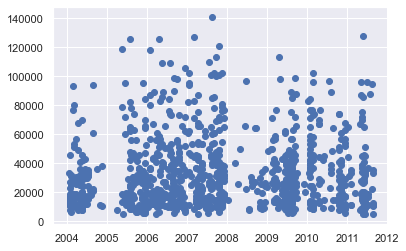

In [19]:
fig , ax = plt.subplots()
ax.scatter(df["saledate"][:1000],df["SalePrice"][:1000])

In [20]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68,4640,2838,3486,722
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [21]:
#sort the DF by saledate
df = df.sort_values(by = ["saledate"],ascending = True)
df.saledate.head(10)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
Name: saledate, dtype: datetime64[ns]

In [22]:
#copy the original dataframe before changing it
df_new = df.copy()

In [23]:
### Add datetime  attributes colum to the new df
df_new["saleYear"] = df_new.saledate.dt.year
df_new["saleMonth"] = df_new.saledate.dt.month
df_new["saleDay"] = df_new.saledate.dt.day
df_new["saleDayOfWeek"] = df_new.saledate.dt.dayofweek
df_new["saleDayOfYear"] = df_new.saledate.dt.dayofyear

In [24]:
df_new.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500,14000,50000,16000,22000
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18,99,99,99,99
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [25]:
#remove saledate after saving date parameters
df_new.drop("saledate",axis=1,inplace = True)

### Clean the DATA
now we will remove and change unnecessary/empty values 

In [26]:
# Convert the string to catagories
pd.api.types.is_string_dtype(df_new["UsageBand"])

True

In [27]:
for label, content in df_new.items():
    if pd.api.types.is_string_dtype(content):
        df_new[label] = content.astype("category").cat.as_ordered()


In [28]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor       

### Fill missing values

In [29]:
# check whate values are missing 
df_new.isna().sum()/len(df_new)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [30]:
for label, content in df_new.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

auctioneerID
MachineHoursCurrentMeter


In [38]:
# Fill numeric rows with the median (avoid the outliners)
for label, content in df_new.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            # Add a binary column which tells if the data was missing our not
            df_new[label+"_is_missing"] = pd.isnull(content)
            # Fill missing numeric values with median since it's more robust than the mean
            df_new[label] = content.fillna(content.median())

In [39]:
for label, content in df_new.items():
     # Check columns which *aren't* numeric
    if not pd.api.types.is_numeric_dtype(content):
        # Add binary column to inidicate whether sample had missing value
        df_new[label+"_is_missing"] = pd.isnull(content)
        # We add the +1 because pandas encodes missing categories as -1
        df_new[label] = pd.Categorical(content).codes+1

In [40]:
df_new.isna().sum()[df_new.isna().sum()>0]

Series([], dtype: int64)

Now all the data is numerical and we can start the modeling phase.
avcorse we could have removed some of the values because more then 80% of the data was null, but for now we will start the model.

## Modeling
There are alot of attributes so lets try a model approch to see what is relevant

In [41]:
%%time
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs = -1,
                             random_state=42)

model.fit(df_new.drop("SalePrice",axis= 1),
         df_new["SalePrice"])

Wall time: 5min 54s


RandomForestRegressor(n_jobs=-1, random_state=42)

In [42]:
# Score the model on the test data
model.score(df_new.drop("SalePrice",axis= 1),
         df_new["SalePrice"])

0.9875445816591006

In [45]:
#Splite the data to validation and train 
# (from the documentation we can lewrn that the validation should be after 2012)
df_val = df_new[df_new.saleYear==2012]
df_train = df_new[df_new.saleYear!=2012]

len(df_val)/len(df_new),len(df_train)/len(df_new)

(0.028042297273066504, 0.9719577027269335)

In [46]:
# Split data into X y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

In [58]:
#buliding evaluation metric, 
#the competition uses RMSLE (root mean squared log error)
from sklearn.metrics import mean_absolute_error,mean_squared_log_error

def rmsle(y_test,y_pred):
    """
    Calculate RMSLE (root mean squared log error)
    """
    return np.sqrt(mean_squared_log_error(y_test,y_pred))

# Function to evaluate model in a few deiffrent levels
def show_scores(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train, train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train, train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R^2": model.score(X_train, y_train),
              "Valid R^2": model.score(X_valid, y_valid)}
    return scores

### Testing our model on a subset to tune the hyperparameters

In [49]:
#Change the max_samples value
model = RandomForestRegressor(n_jobs= -1,
                             random_state=42,
                             max_samples=10000)

In [50]:
%%time
model.fit(X_train,y_train)

Wall time: 11.5 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [59]:
show_scores(model)

{'Training MAE': 5562.095336615769,
 'Valid MAE': 7170.174067225437,
 'Training RMSLE': 0.25769905315247876,
 'Valid RMSLE': 0.29267406661390644,
 'Training R^2': 0.8605542549153568,
 'Valid R^2': 0.8323397516293812}

## Hyperparameter tuning with RandomizedSearchCV

In [60]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestClassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=20,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 10.9min finished


Wall time: 11min 7s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [61]:
# Find the best parameters from the RandomizedSearchCV 
rs_model.best_params_

{'n_estimators': 90,
 'min_samples_split': 8,
 'min_samples_leaf': 1,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [68]:
%%time
# Train the model with the best pararmeters 
CV_model = RandomForestRegressor(n_estimators=40,
                                min_samples_split=14,
                                min_samples_leaf=1,
                                max_features= 0.5,
                                random_state=42)
CV_model.fit(X_train,y_train)

Wall time: 2min 10s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      random_state=42)

In [69]:
#Show the scores
show_scores(CV_model)

{'Training MAE': 2958.525694860444,
 'Valid MAE': 5960.080609622619,
 'Training RMSLE': 0.14484724514847727,
 'Valid RMSLE': 0.24692180494715776,
 'Training R^2': 0.9587093056181626,
 'Valid R^2': 0.88116816060368}

### Make predictions on test data

In [86]:
# Import the test data
test_df = pd.read_csv("Data/Test.csv",
                     low_memory=False,
                     parse_dates=["saledate"])
test_df.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [87]:
#Preproccesing the data
def preprocess_data(df):
    """
    Preprocess unseen data to fit the model
    """
        # Add datetime parameters for saledate
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    # Drop original saledate
    df.drop("saledate", axis=1, inplace=True)
    
    # Fill numeric rows with the median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median())
                
        # Turn categorical variables into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"_is_missing"] = pd.isnull(content)
            # We add the +1 because pandas encodes missing categories as -1
            df[label] = pd.Categorical(content).codes+1        
    
    return df

In [88]:
test_df = preprocess_data(test_df)

In [89]:
# Make predictions on test data
CV_model.predict(test_df)

ValueError: Number of features of the model must match the input. Model n_features is 102 and input n_features is 101 

In [90]:
# find out what are the missing columns
set(X_train.columns) - set(test_df.columns)

{'auctioneerID_is_missing'}

In [91]:
# Lets add a column auctioneerID_is_missing with all false values
test_df['auctioneerID_is_missing'] = False

In [92]:
# Now we call make predictions
# Make predictions on test data
test_pred = CV_model.predict(test_df)

In [94]:
test_pred

array([17699.40283986, 15323.48268964, 51178.31732513, ...,
       13646.28034948, 18972.42792312, 25595.19590287])

In [97]:
# Format prediction for Kaggle
df_pred = pd.DataFrame()
df_pred["SalesID"] = test_df["SalesID"]
df_pred["SalesPrice"] = test_pred
df_pred.head()

,SalesID,SalesPrice
0,1227829,17699.402840
1,1227844,15323.482690
2,1227847,51178.317325
3,1227848,62016.373917
4,1227863,47597.489432


In [98]:
# Export to CSV
df_pred.to_csv("Data/test_predictions.csv")

### Feature importence

In [99]:
# Find feature importance of our best model
CV_model.feature_importances_

array([3.51586239e-02, 1.97748915e-02, 4.27606681e-02, 1.90613314e-03,
       3.27463962e-03, 2.00566731e-01, 3.22413890e-03, 9.85267576e-04,
       4.18931247e-02, 4.12083250e-02, 5.85903765e-02, 5.03002146e-03,
       1.67465985e-02, 1.35160647e-01, 4.78636632e-02, 5.92562512e-03,
       6.14735201e-03, 2.85439154e-03, 2.52573440e-03, 7.88450568e-02,
       4.21322981e-04, 5.24705610e-05, 1.50466818e-03, 1.87321771e-04,
       1.60328985e-03, 2.33144276e-05, 6.08490143e-03, 4.24131965e-03,
       2.29797041e-03, 2.97001329e-04, 2.17585157e-03, 1.63181193e-03,
       3.43030065e-03, 5.21618040e-04, 2.76700679e-04, 1.11879269e-02,
       8.16204101e-04, 1.44301025e-02, 1.94922078e-03, 1.35713882e-03,
       8.54963616e-04, 8.40145068e-04, 1.17918748e-03, 5.59509850e-04,
       5.79062374e-04, 3.59684011e-04, 2.72938291e-04, 2.41085143e-03,
       8.67104315e-04, 2.33938693e-04, 1.54600792e-04, 7.38865439e-02,
       3.71810242e-03, 5.68797343e-03, 2.91434259e-03, 9.91372727e-03,
      

In [100]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))
    
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h")

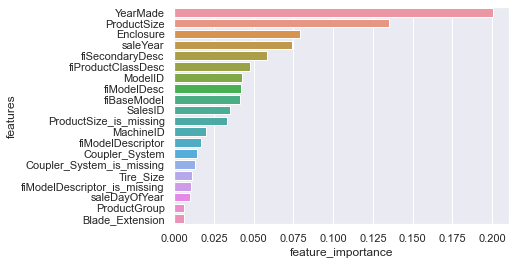

In [102]:
plot_features(X_train.columns, CV_model.feature_importances_)

In [111]:
print("Sum of feature importence should be close to 1: ",sum(CV_model.feature_importances_))
print("Product size nall: ",df.ProductSize.isna().sum())
print("Product size value count: \n",df.ProductSize.value_counts())
print("Turbocharged size value count: \n",df.Turbocharged.value_counts())
print("Thumb  value count: \n",df.Thumb.value_counts())

Sum of feature importence should be close to 1:  1.0000000000000002
Product size nall:  216605
Product size value count: 
 Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: ProductSize, dtype: int64
Turbocharged size value count: 
 None or Unspecified    77111
Yes                     3985
Name: Turbocharged, dtype: int64
Thumb  value count: 
 None or Unspecified    85074
Manual                  9678
Hydraulic               7580
Name: Thumb, dtype: int64
